# Importing Essentials

In [1]:
# Importing useful packages
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import math
#tabulate
from qiskit import QuantumCircuit, execute, Aer

# Importing QISKit
#qiskit.aqua.algorithms.adaptive remove adaptive
#remove the op_converter import and use op_converter.to_weighted_pauli_operator
from qiskit import Aer, execute, BasicAer

from qiskit.aqua.components.initial_states import Zero
from qiskit.aqua.algorithms import VQE
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.operators import WeightedPauliOperator
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.aqua.components.initial_states import Custom
from qiskit.aqua.components.variational_forms import RY, RYRZ
#from qiskit.aqua.operators.op_converter import to_weighted_pauli_operator
from qiskit.aqua.components.optimizers import COBYLA, SPSA, L_BFGS_B, SLSQP
from qiskit.aqua.operators import (TPBGroupedWeightedPauliOperator, WeightedPauliOperator, MatrixOperator)
from qiskit.aqua.operators.legacy import op_converter

plt.figure(figsize=(12,10))

import qiskit.tools.jupyter 
%qiskit_version_table

<Figure size 864x720 with 0 Axes>

# VQE Method

In [2]:
def VQE_result(**kwargs):
    
    file_path = kwargs['file_path']
    init_state_name = kwargs['init_state_name']
    vf_name = kwargs['vf_name']
    depth = kwargs['depth']
    shots = kwargs['shots']
    simulator = kwargs['simulator']
    
    # Loading matrix representation of Hamiltonian txt file
    H = np.loadtxt(file_path)
    
    # Converting Hamiltonian to Matrix Operator
    qubit_op = MatrixOperator(matrix=H)
    
    
    
    
    # Converting to Pauli Operator
    qubit_op = op_converter.to_weighted_pauli_operator(qubit_op)
    #print("!! dense_matrix", qubit_op.paulis)
    
    start = time.time()
    
    num_qubits = qubit_op.num_qubits
    num_paulis = len(qubit_op.paulis)
    num_qubits = qubit_op.num_qubits
    #print(qubit_op.paulis)
    #print(num_qubits, num_paulis, num_qubits,  "!!!!!!!!!!!!!!!!!!!!")
    
    print(f"""{num_paulis} Pauli factors \n{round(time.time()-start)} s to process""")
    
    
    
    # Solving system exactly for reference value
    ee = ExactEigensolver(qubit_op)
    #print(ee)
    result = ee.run()
    
    ref = result['energy']

    # Setting initial state, variational form, and backend
    init_state = init_state_name(num_qubits)
    var_form = vf_name(num_qubits,
                      depth=depth,
                      entanglement='linear',
                      initial_state=init_state)
    
    backend = BasicAer.get_backend(simulator)
    

    # Don't use SPSA if using a noiseless simulator
    if simulator == 'statevector_simulator':
        optimizers = [COBYLA, L_BFGS_B, SLSQP]  
    else:
        optimizers = [SPSA]
    
    # Initializing empty lists & dicts for storage
    dfs = []
    algos = {}
    algo_results = {}
    for optimizer in optimizers:
        # For reproducibility
        aqua_globals.random_seed = 250
        print(f'\rOptimizer: {optimizer.__name__}          ', end='')

        counts = []
        values = []
        params = []
        def store_intermediate_result(eval_count, parameters, mean, std):
            counts.append(eval_count)
            values.append(mean)
            params.append(parameters)
        
        # Running VQE 
        algo = VQE(qubit_op, var_form, optimizer(), callback=store_intermediate_result)
        print(optimizer)
        
        
        quantum_instance = QuantumInstance(backend=backend, shots=shots)  
        algo_result = algo.run(quantum_instance)
        
        
        
        
        # Appending each optimizer data frame to one list
        dfs.append(pd.DataFrame(values, columns=['convergence_vals'], index=counts))
        algos[optimizer.__name__]        = algo
        algo_results[optimizer.__name__] = algo_result

    return algo_results      


In [3]:
def VQE_optimal_vector(**kwargs):
    
    file_path = kwargs['file_path']
    init_state_name = kwargs['init_state_name']
    vf_name = kwargs['vf_name']
    depth = kwargs['depth']
    shots = kwargs['shots']
    simulator = kwargs['simulator']
    
    # Loading matrix representation of Hamiltonian txt file
    H = np.loadtxt(file_path)
    
    # Converting Hamiltonian to Matrix Operator
    qubit_op = MatrixOperator(matrix=H)
    
    
    
    
    # Converting to Pauli Operator
    qubit_op = op_converter.to_weighted_pauli_operator(qubit_op)
    #print("!! dense_matrix", qubit_op.paulis)
    
    start = time.time()
    
    num_qubits = qubit_op.num_qubits
    num_paulis = len(qubit_op.paulis)
    num_qubits = qubit_op.num_qubits
    #print(qubit_op.paulis)
    #print(num_qubits, num_paulis, num_qubits,  "!!!!!!!!!!!!!!!!!!!!")
    
    print(f"""{num_paulis} Pauli factors \n{round(time.time()-start)} s to process""")
    
    
    
    # Solving system exactly for reference value
    ee = ExactEigensolver(qubit_op)
    #print(ee)
    result = ee.run()
    
    ref = result['energy']

    # Setting initial state, variational form, and backend
    init_state = init_state_name(num_qubits)
    var_form = vf_name(num_qubits,
                      depth=depth,
                      entanglement='linear',
                      initial_state=init_state)
    
    backend = BasicAer.get_backend(simulator)
    

    # Don't use SPSA if using a noiseless simulator
    if simulator == 'statevector_simulator':
        optimizers = [COBYLA, L_BFGS_B, SLSQP]  
    else:
        optimizers = [SPSA]
    
    # Initializing empty lists & dicts for storage
    dfs = []
    algos = {}
    algo_results = {}
    for optimizer in optimizers:
        # For reproducibility
        aqua_globals.random_seed = 250
        print(f'\rOptimizer: {optimizer.__name__}          ', end='')

        counts = []
        values = []
        params = []
        def store_intermediate_result(eval_count, parameters, mean, std):
            counts.append(eval_count)
            values.append(mean)
            params.append(parameters)
        
        # Running VQE 
        algo=VQE(qubit_op, var_form, optimizer(), callback=store_intermediate_result)
        
        quantum_instance = QuantumInstance(backend=backend, shots=shots)  
        algo_result = algo.run(quantum_instance)
        unitary=[]
        for i in algo.get_optimal_vector():
            a=np.conj(i)*i
            unitary.append(a.real)
            #print(a.real)
        a=max(unitary)
        unit=[]
        for i in unitary:
            unit.append(i/a)
        
        
        x=range(0,len(unit))
        plt.plot(x,unit)
        plt.show()
        
        
        H = np.zeros((len(unitary))**2).reshape(len(unitary),len(unitary))
        
        for i in range(0,len(unitary)):
            for j in range(0, len(unitary)):
                if i==j:
                    H[i,j]=unitary[i]
        
        
        
        
        

            
        


# Classical Result

In [4]:
def classical_result(**kwargs):
    
    file_path = kwargs['file_path']
    init_state_name = kwargs['init_state_name']
    vf_name = kwargs['vf_name']
    depth = kwargs['depth']
    shots = kwargs['shots']
    simulator = kwargs['simulator']
    
    # Loading matrix representation of Hamiltonian txt file
    H = np.loadtxt(file_path)
    
    # Converting Hamiltonian to Matrix Operator
    qubit_op = MatrixOperator(matrix=H)
    
    
    
    
    # Converting to Pauli Operator
    qubit_op = op_converter.to_weighted_pauli_operator(qubit_op)
    #print("!! dense_matrix", qubit_op.paulis)
    
    start = time.time()
    
    num_qubits = qubit_op.num_qubits
    num_paulis = len(qubit_op.paulis)
    num_qubits = qubit_op.num_qubits
    
    
    
    # Solving system exactly for reference value
    ee = ExactEigensolver(qubit_op)
    #print(ee)
    result = ee.run()
    return result['energy']
    
    


INPUT

In [5]:
h_osc_params = {
    'file_path': r'JA_harmonic_oscillator_q=4.txt',
    'init_state_name': Zero,
    'vf_name': RY,
    'depth': 3,
    'shots': 1000,
    'simulator': 'statevector_simulator'}


anh_gs = (3/8) * (6 / (1/2)**2) ** (1/3)
print(f'Upper bound for the ground state energy of the anharmonic oscillator: {anh_gs:.2f} eV')
print(f'Percent error: {abs((anh_gs-1.06)/1.06)*100:.2f}%')


anh_osc_params = {
    'file_path': r'Anharmonic_q=4_la=0.000.txt',
    'init_state_name': Zero,
    'vf_name': RY,
    'depth': 5,
    'shots': 5000,
    'simulator': 'statevector_simulator'
}


Upper bound for the ground state energy of the anharmonic oscillator: 1.08 eV
Percent error: 2.05%


In [14]:
Anharmonic=['Anharmonic_q=4_la=0.000.txt',
           'Anharmonic_q=4_la=0.100.txt',
           'Anharmonic_q=4_la=0.200.txt',
           'Anharmonic_q=4_la=0.300.txt',
           'Anharmonic_q=4_la=0.400.txt',
           'Anharmonic_q=4_la=0.500.txt',
           'Anharmonic_q=4_la=0.600.txt',
           'Anharmonic_q=4_la=0.700.txt',
           'Anharmonic_q=4_la=0.800.txt',
           'Anharmonic_q=4_la=0.900.txt',
           'Anharmonic_q=4_la=1.000.txt',
           'Anharmonic_q=4_la=1.100.txt',
           'Anharmonic_q=4_la=1.200.txt',
           'Anharmonic_q=4_la=1.300.txt',
           'Anharmonic_q=4_la=1.400.txt',
           'Anharmonic_q=4_la=1.500.txt',
           'Anharmonic_q=4_la=1.600.txt',
           'Anharmonic_q=4_la=1.700.txt',
           'Anharmonic_q=4_la=1.800.txt',
           'Anharmonic_q=4_la=1.900.txt',
           'Anharmonic_q=4_la=2.000.txt',
           'Anharmonic_q=4_la=2.100.txt',
           'Anharmonic_q=4_la=2.200.txt',
           'Anharmonic_q=4_la=2.300.txt',
           'Anharmonic_q=4_la=2.400.txt',
           'Anharmonic_q=4_la=2.500.txt',
           'Anharmonic_q=4_la=2.600.txt',
           'Anharmonic_q=4_la=2.700.txt',
           'Anharmonic_q=4_la=2.800.txt',
           'Anharmonic_q=4_la=2.900.txt',
           'Anharmonic_q=4_la=3.000.txt',]

anh_osc_results_list=[]
for i in range(0,len(Anharmonic)):
    anh_osc_params = {
        'file_path': Anharmonic[i],
        'init_state_name': Zero,
        'vf_name': RY,
        'depth': 5,
        'shots': 500,
        'simulator': 'statevector_simulator'
    }
    
    anh_osc_results        = VQE_result(**anh_osc_params)
    anh_osc_results_list.append(anh_osc_results)
    
    


15 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: The qiskit.aqua.components.variational_forms.RY object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.RealAmplitudes (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>
55 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solv

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solv

0.5
0.5591463188932421
0.6024053450745797
0.6379928610343221
0.6687736402702142
0.6961731221809674
0.7210270490309659
0.743876923428733
0.7650982467638568
0.784964461939624
0.8036821303147471
0.8214117792382684
0.8382810024632712
0.8543930899944739
0.8698329368324751
0.884671220248347
0.8989674332812013
0.9127721382216629
0.9261286734341009
0.9390744679212466
0.9516420686051487
0.9638599534044577
0.9757531820654445
0.9873439223772636
0.998651879477551
1.0096946489560312
1.0204880094324593
1.0310461666251967
1.0413819582182795
1.0515070268086097
1.0614319666817813


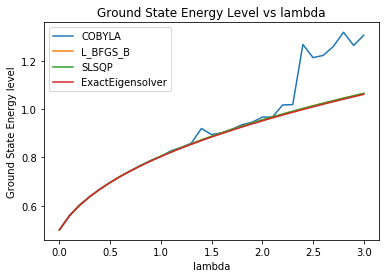

In [65]:
anh_osc_class_results_list=[]

for i in range(0,len(Anharmonic)):
    anh_osc_params = {
        'file_path': Anharmonic[i],
        'init_state_name': Zero,
        'vf_name': RY,
        'depth': 5,
        'shots': 500,
        'simulator': 'statevector_simulator'
    }
    
    anh_osc_class_results = classical_result(**anh_osc_params)
    
    anh_osc_class_results_list.append(anh_osc_class_results)



anh_osc_C_state=[]
anh_osc_L_state=[]
anh_osc_S_state=[]

anh_osc_class_state=[]


for i in range(0,len(anh_osc_results_list)):
    print(anh_osc_class_results_list[i])
    anh_osc_C_state.append(anh_osc_results_list[i]['COBYLA']['eigenvalue'])
    anh_osc_L_state.append(anh_osc_results_list[i]['L_BFGS_B']['eigenvalue'])
    anh_osc_S_state.append(anh_osc_results_list[i]['SLSQP']['eigenvalue'])

    anh_osc_class_state.append(anh_osc_class_results_list[i])
    
    
x=np.linspace(0.0,3.0,num=31)
plt.plot(x,anh_osc_C_state, label='COBYLA')
plt.plot(x,anh_osc_L_state, label='L_BFGS_B')
plt.plot(x,anh_osc_S_state, label='SLSQP')

plt.plot(x,anh_osc_class_state, label='ExactEigensolver')
plt.title("Ground State Energy Level vs lambda")
plt.xlabel("lambda")
plt.ylabel("Ground State Energy level")

plt.legend()
plt.show()




In [54]:

# Defne potential energy function. Change this to change the potential.
def Vpot(x):
    return x**4

# Enter computational parameters
a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))


enter lower limit of the domain: -6
enter upper limit of the domain: 6
enter number of grid points: 18


In [55]:

# Define x grid and step size
x = np.linspace(a,b,N)
h = x[1]-x[0]

# Create Kinetic Energy Matrix
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

# Create Potential Energy Matrix
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0


[1. 3. 5. 7.]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


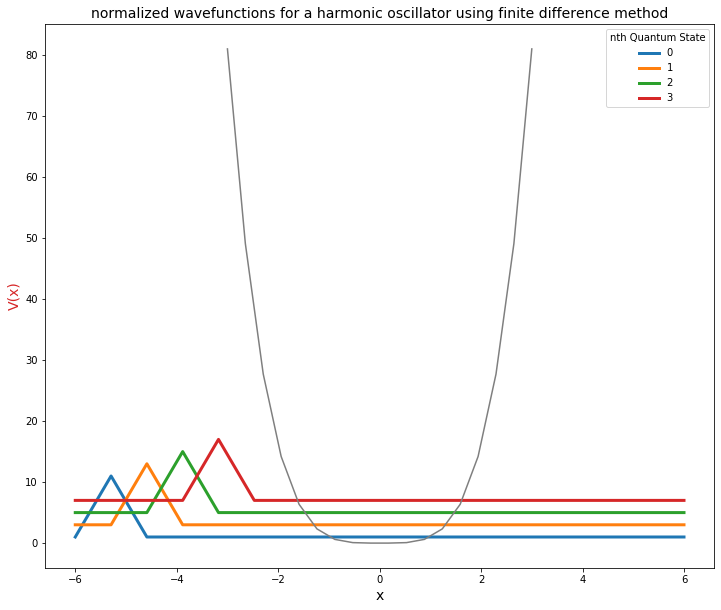

[1.         3.16464904 5.61324284 8.27846967]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


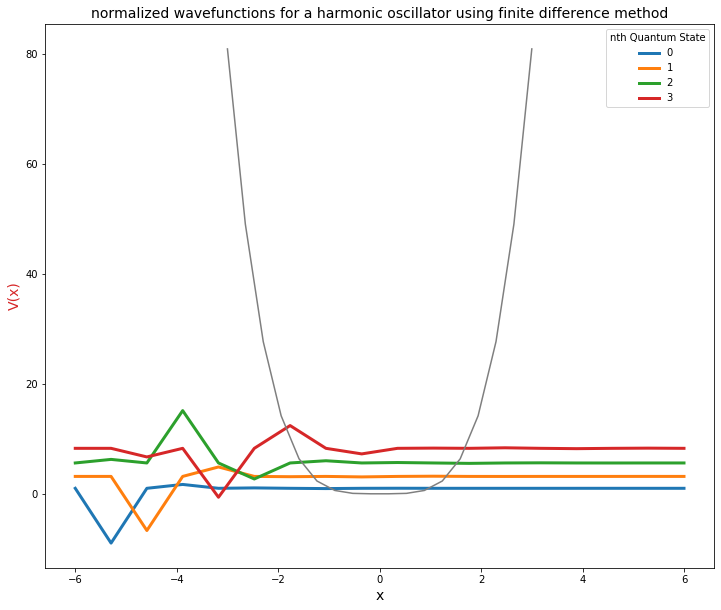

[1.         3.23792309 5.87020148 8.78043661]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


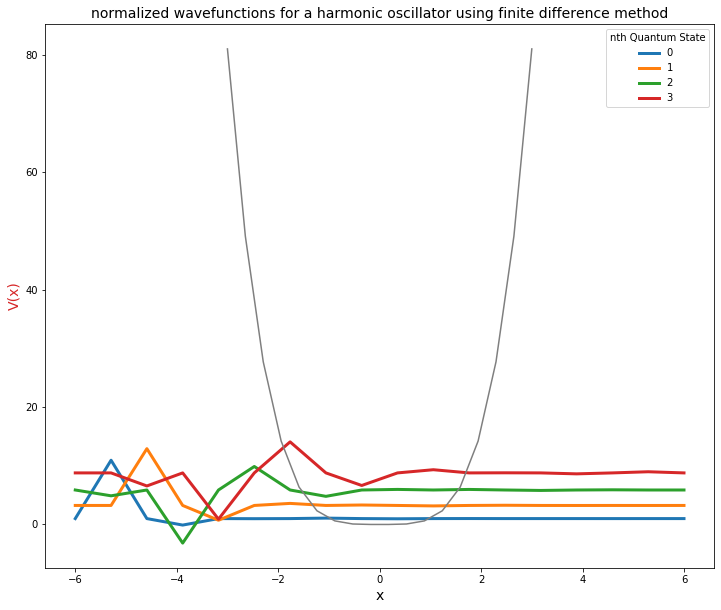

[1.         3.28320507 6.02631095 9.0754802 ]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


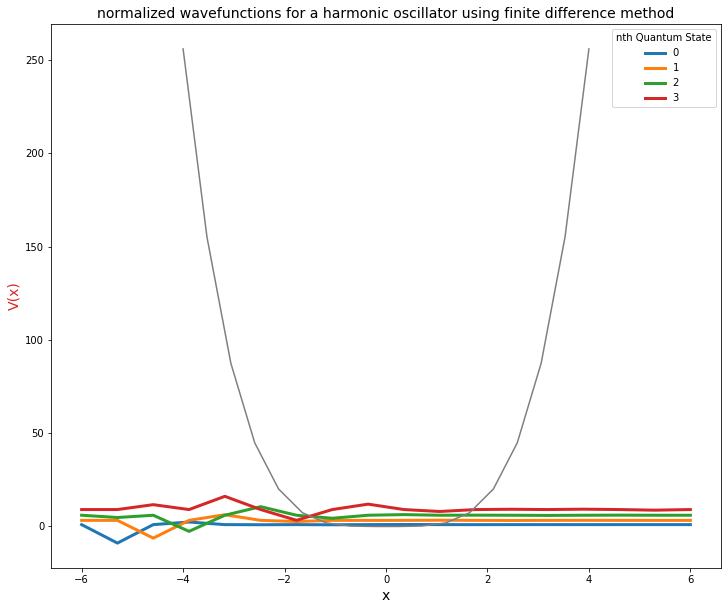

[1.         3.31496506 6.13540354 9.28012774]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


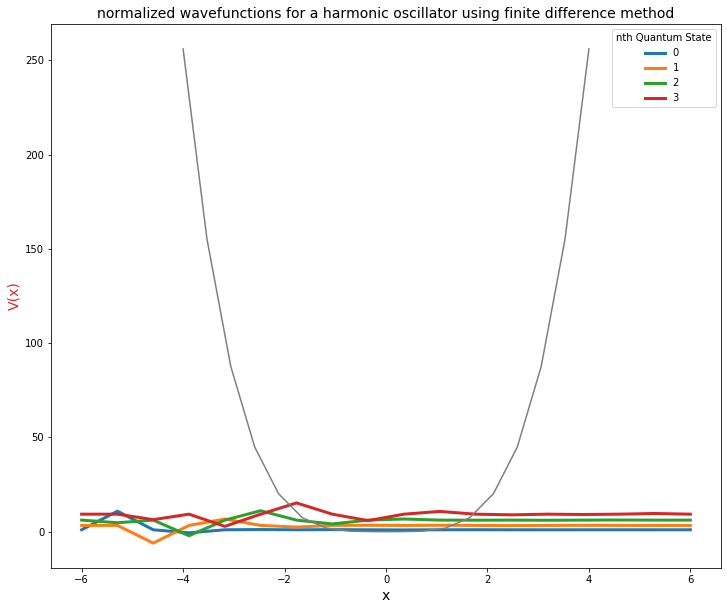

[1.         3.33881003 6.21780653 9.43949061]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


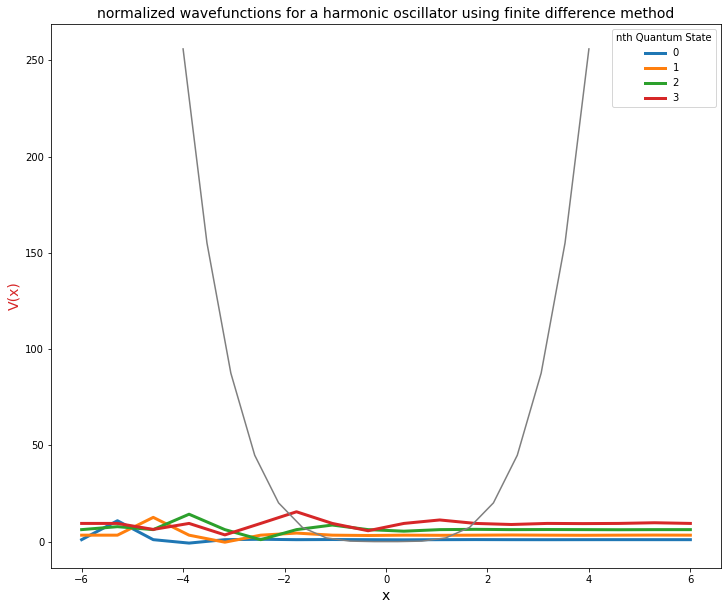

[1.         3.35747089 6.28299264 9.57304867]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


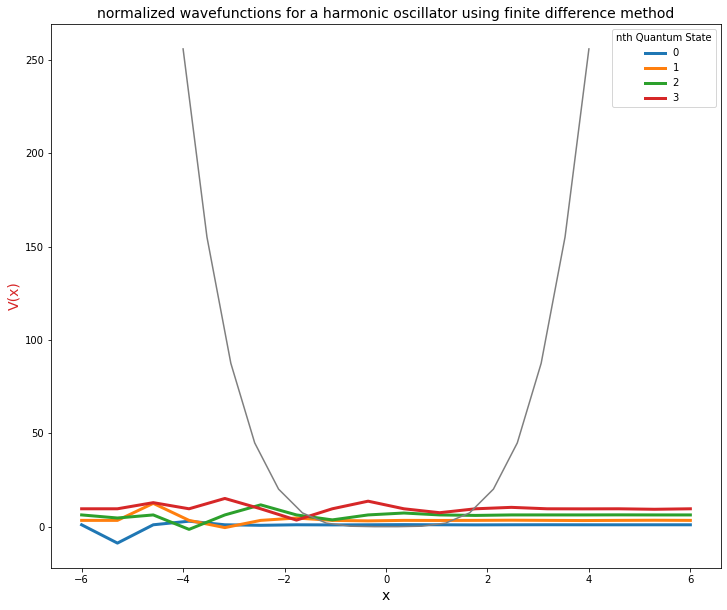

[1.         3.37248585 6.33597361 9.6890723 ]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


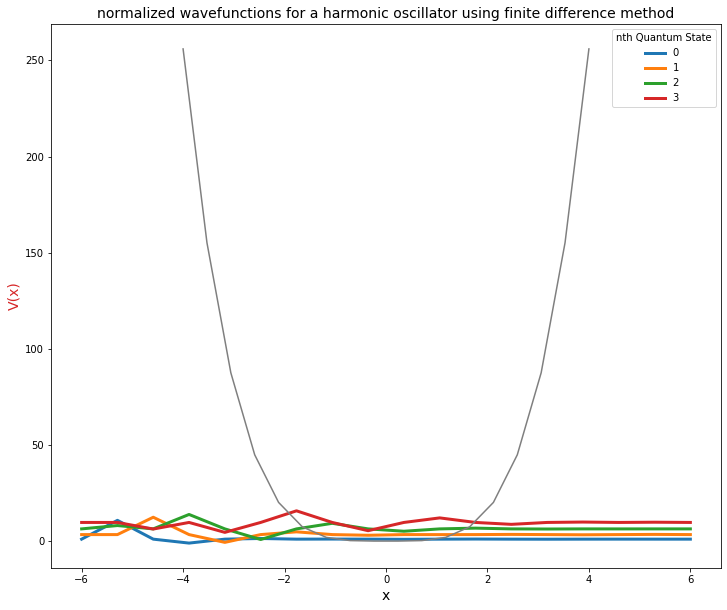

[1.         3.38481516 6.37968515 9.79059926]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


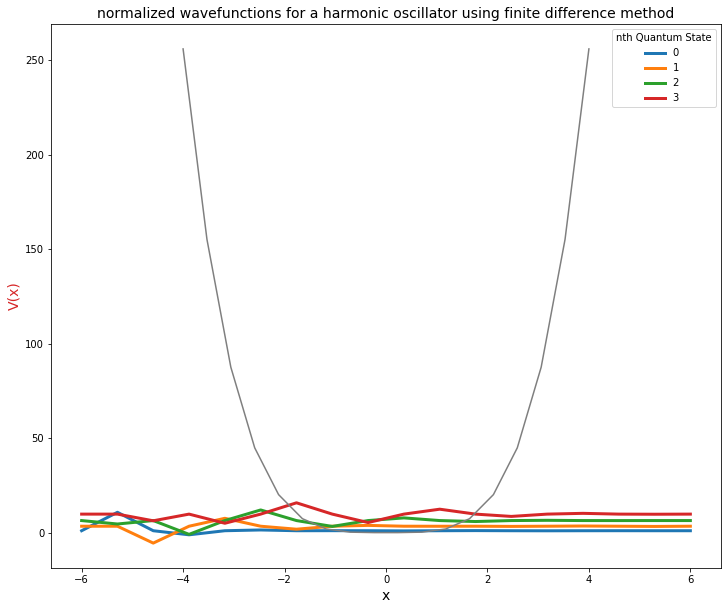

[1.         3.39510446 6.41601211 9.87818666]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


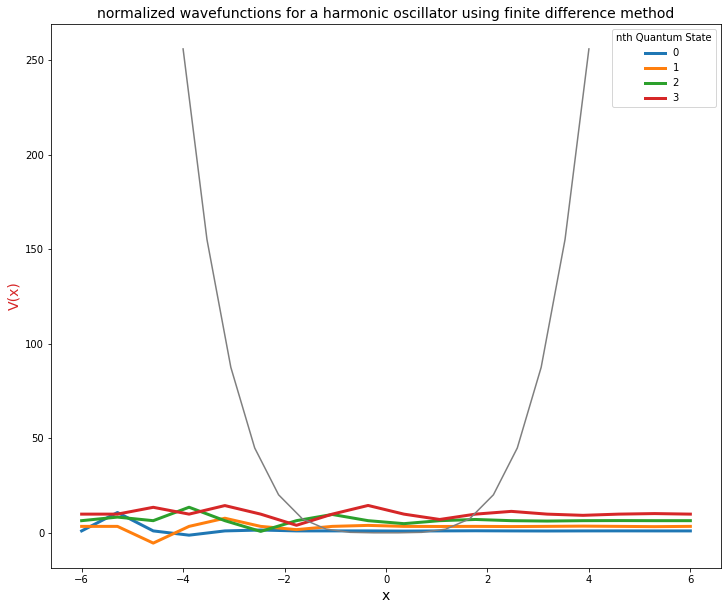

[1.        3.4038117 6.4462688 9.9513095]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


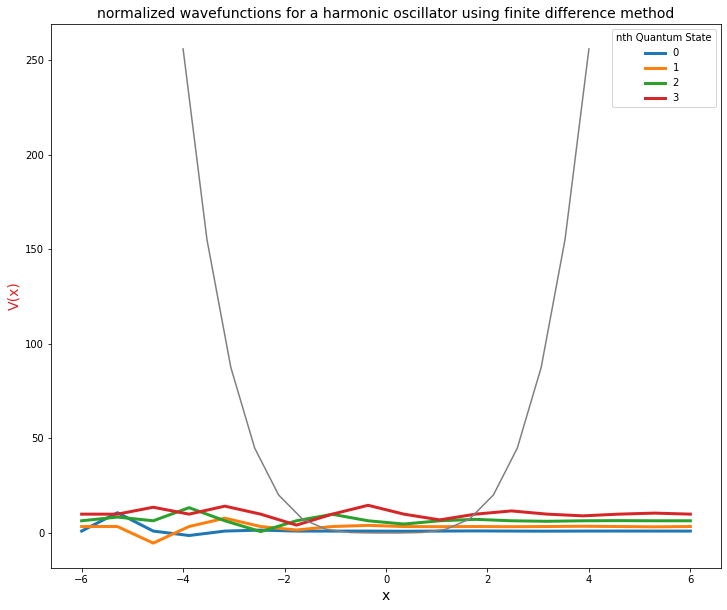

[ 1.          3.41127451  6.47143786 10.00916241]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


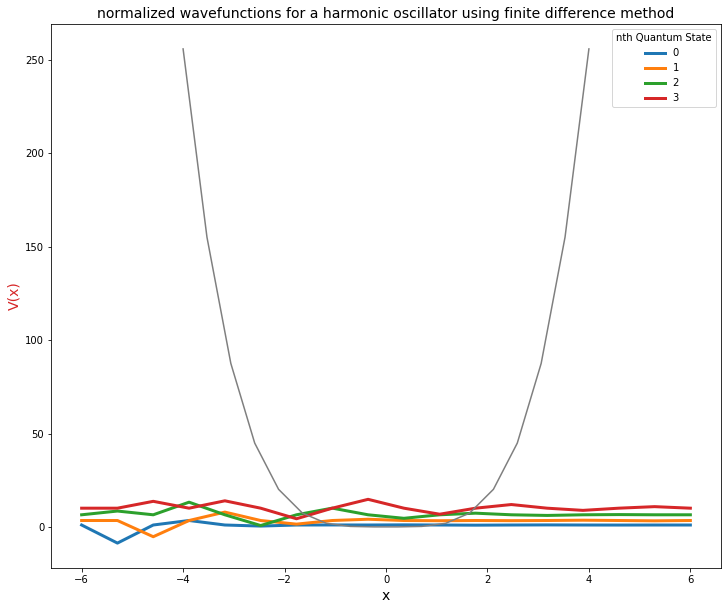

[ 1.          3.41774879  6.49229473 10.05116489]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


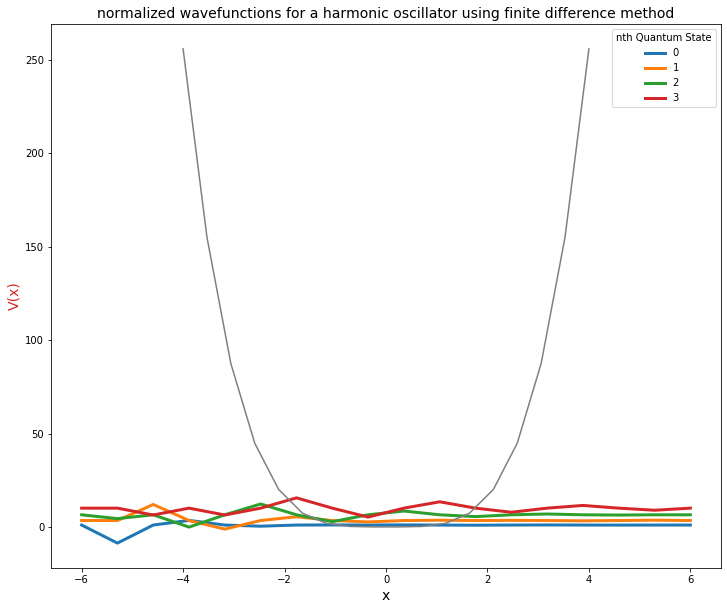

[ 1.          3.42343251  6.50947529 10.0772677 ]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


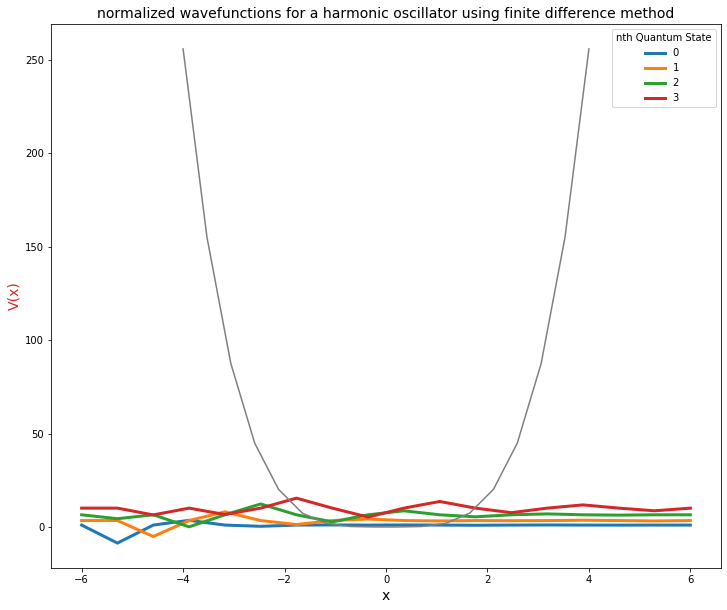

[ 1.          3.42848118  6.52351452 10.08807913]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


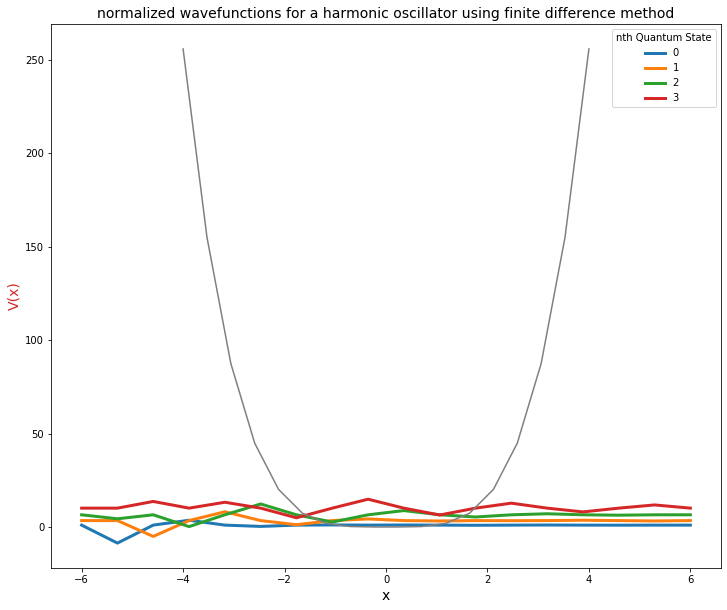

[ 1.          3.43301831  6.53486971 10.08482451]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


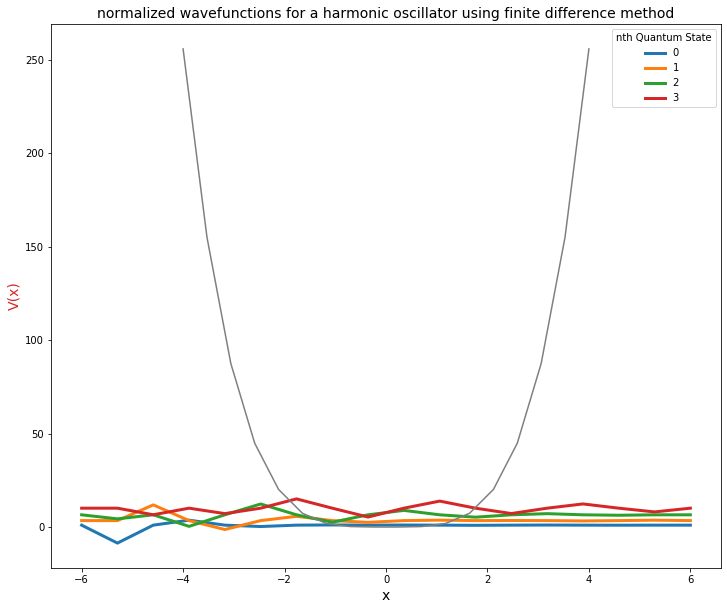

[ 1.          3.43714293  6.54393535 10.06918296]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


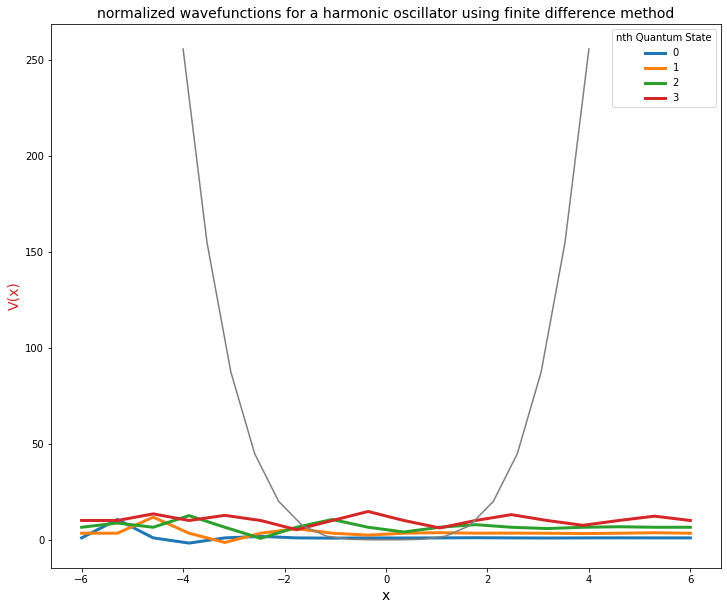

[ 1.          3.44093492  6.55105353 10.04307035]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


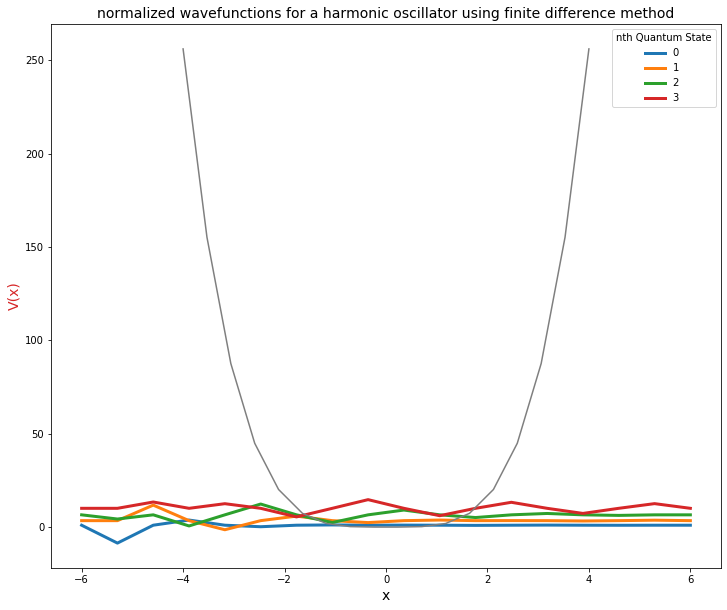

[ 1.          3.44445911  6.55652158 10.00843465]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


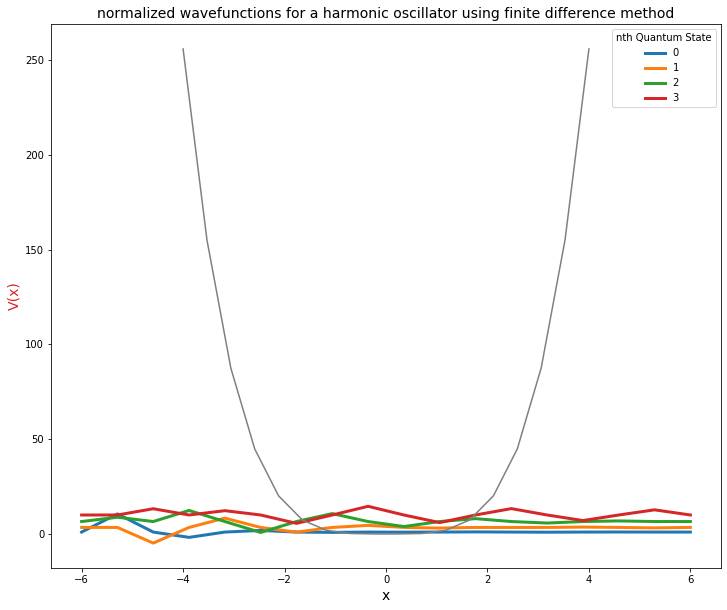

[1.         3.44776829 6.56059819 9.96710429]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


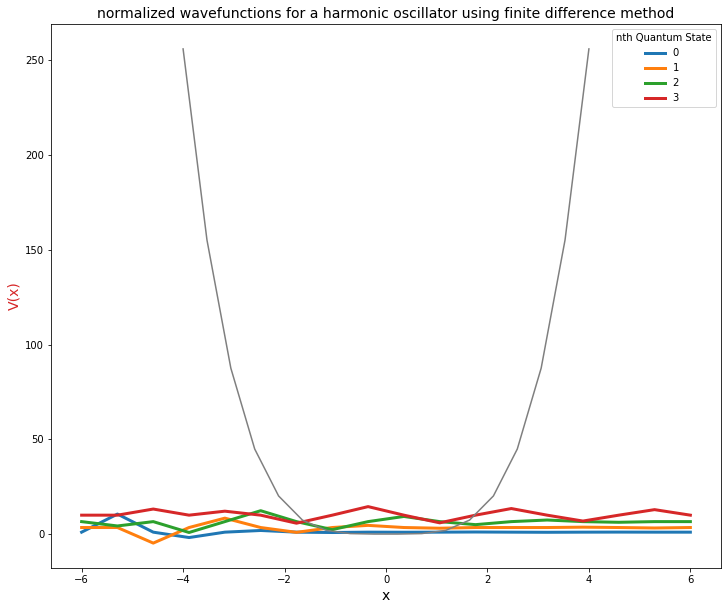

[1.         3.45090563 6.56350837 9.92069964]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


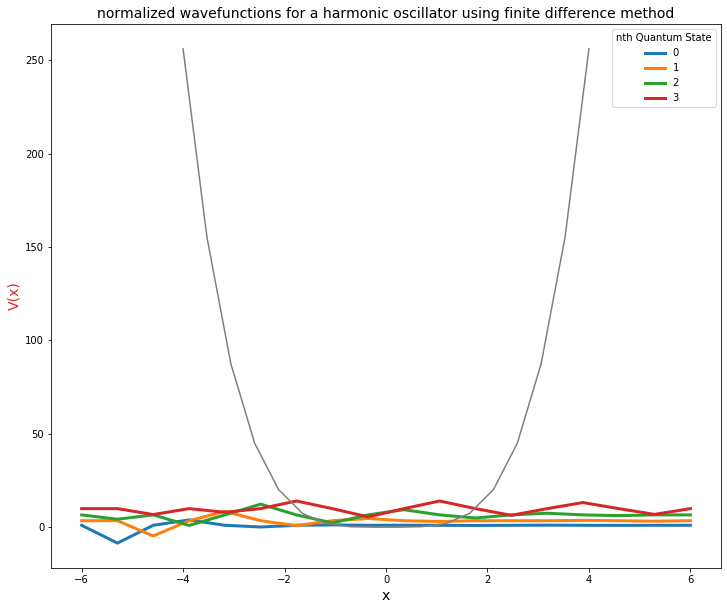

[1.         3.45390648 6.56544778 9.87059794]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


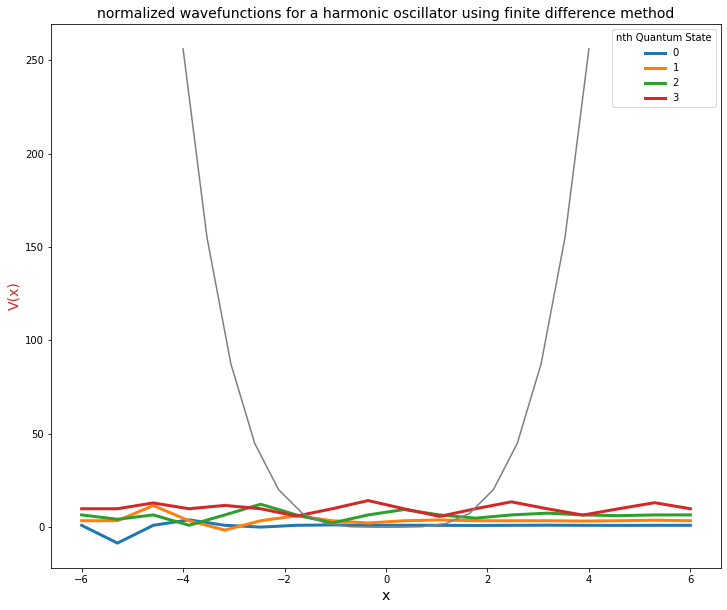

[1.         3.45679981 6.56658639 9.81793464]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


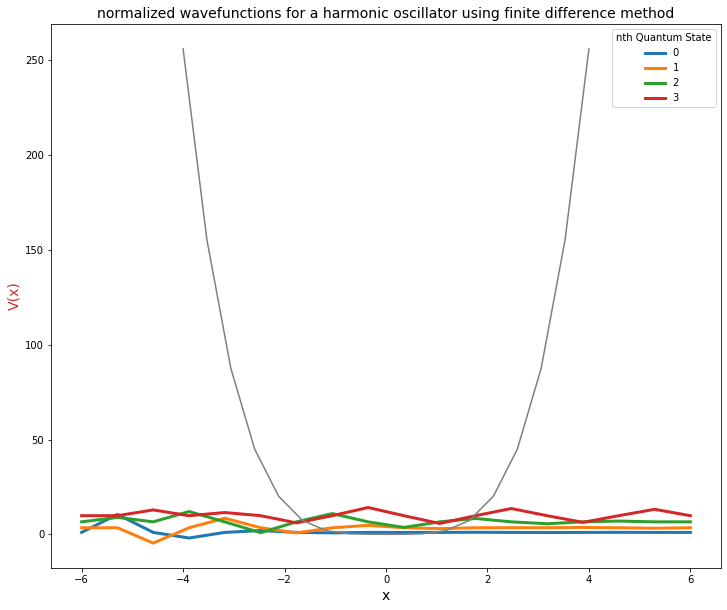

[1.         3.45960944 6.56707177 9.76362515]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


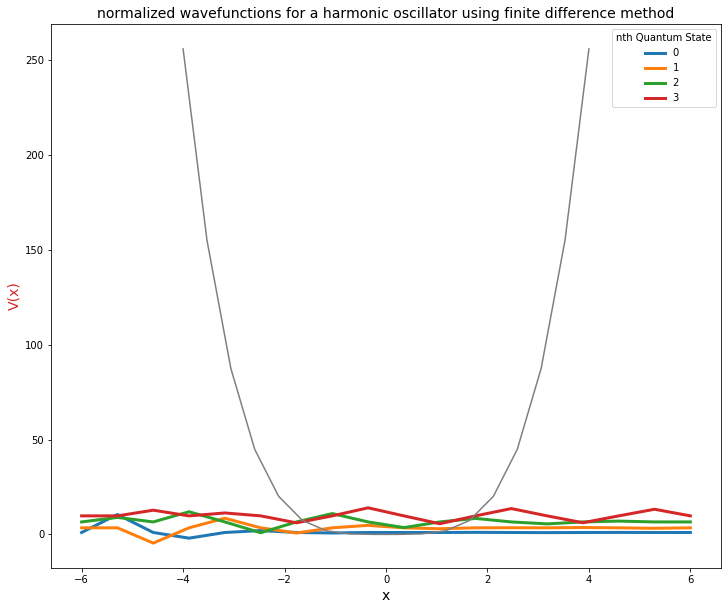

[1.         3.46235489 6.56703186 9.70839515]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


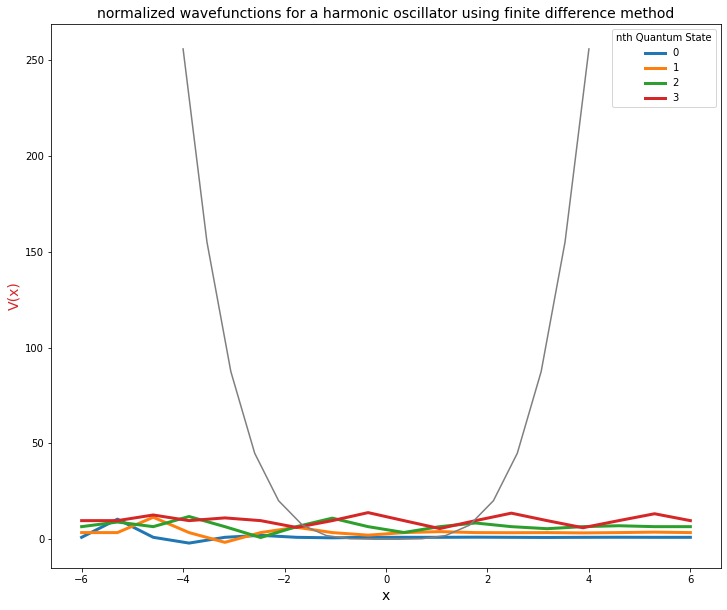

[1.         3.46505216 6.56657754 9.65281242]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


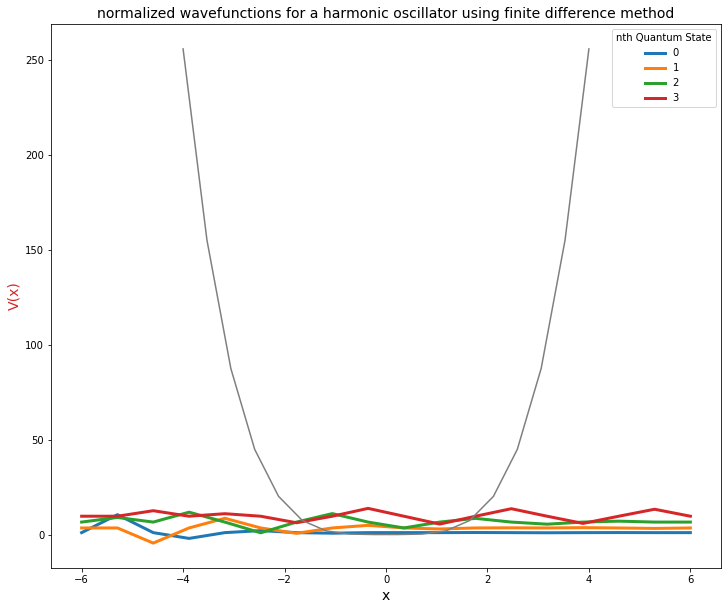

[1.         3.46771435 6.56580476 9.59731634]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


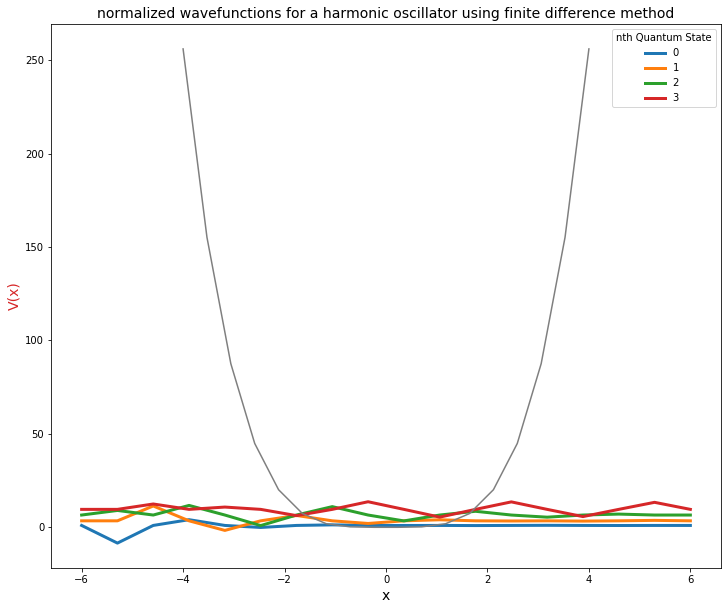

[1.         3.47035212 6.56479651 9.54224343]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


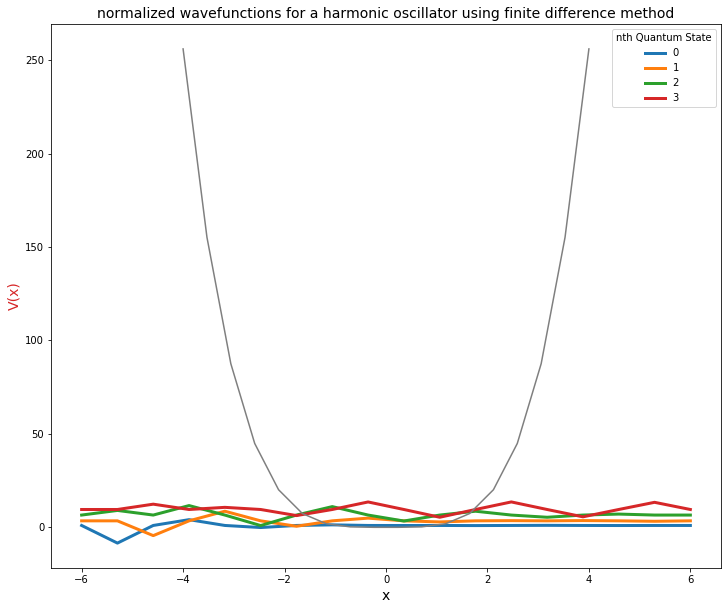

[1.         3.47297413 6.56362446 9.48784873]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


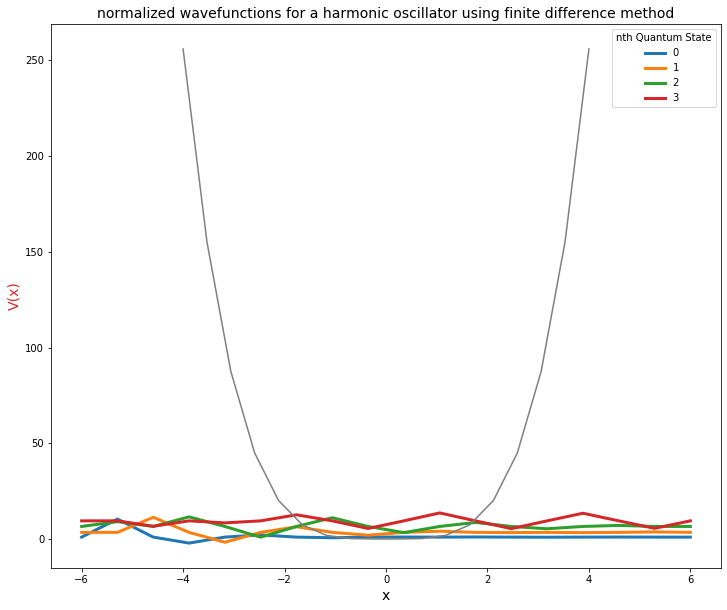

[1.         3.47558736 6.56235043 9.43432307]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


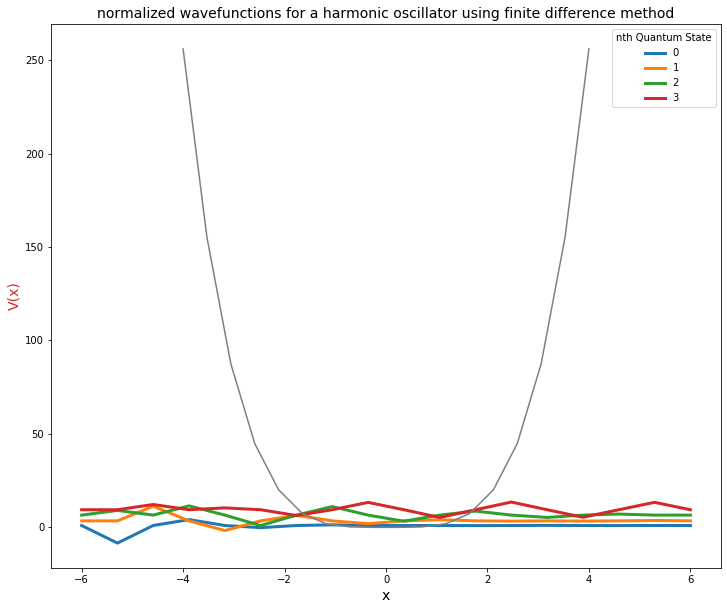

[1.         3.47819738 6.56102769 9.381807  ]
!! 16
18
!! 16
18
!! 16
18
!! 16
18


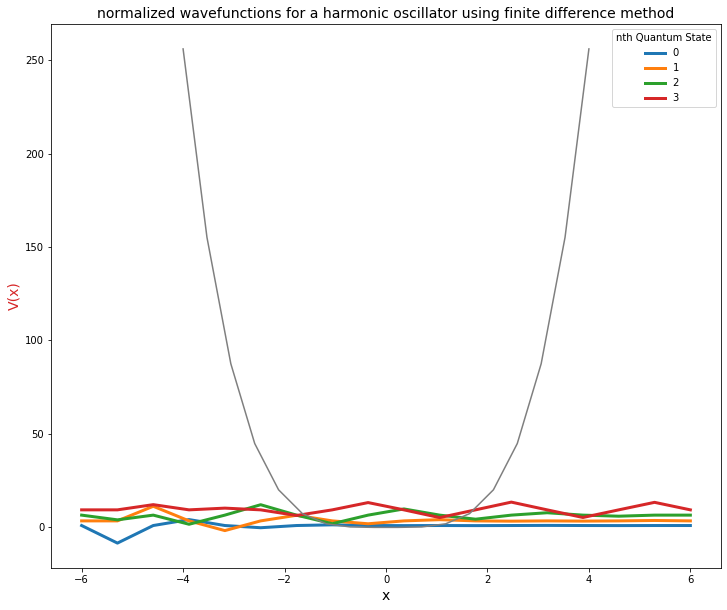

In [58]:
for i in range(0,len(Anharmonic)):
    # Loading matrix representation of Hamiltonian txt file
    H = np.loadtxt(Anharmonic[i])
    
    # Converting Hamiltonian to Matrix Operator
    #qubit_op = MatrixOperator(matrix=H)
    

    val,vec=np.linalg.eig(H)
    z = np.argsort(val)
    z = z[0:4]
    energies=(val[z]/val[z][0])
    
    print(energies)

    # Plot wavefunctions for first 4 lowest states
    plt.figure(figsize=(12,10))
    scalingFactor=10
    for i in range(len(z)):
        y = []
        y = np.append(y,vec[:,z[i]])
        print("!!", len(y))
        y = np.append(y,0)
        y = np.insert(y,0,0)
        print(len(y))
        plt.plot(x,scalingFactor*y+energies[i],lw=3, label="{} ".format(i))

    plt.xlabel('x', size=14)
    plt.ylabel('V(x)',size=14,color='tab:red')
    plt.legend(title="nth Quantum State")
    plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)

    # Create x and potential vectors for plotting
    highestEnergy = math.sqrt(energies[len(energies)-1]) #This returns the square root of thelast element of the energies array. It will be used for the domain of the potential.
    xplot = np.linspace(-math.ceil(highestEnergy),math.ceil(highestEnergy),N)
    Vplot = Vpot(xplot)
    plt.plot(xplot,Vplot,color='tab:gray')

    plt.show()

## Don't Go past this point


In [9]:
h_osc_results        = VQE_result(**h_osc_params)
h_osc_class_results  = classical_result(**h_osc_params)

anh_osc_results        = VQE_result(**anh_osc_params)
anh_osc_class_results  = classical_result(**anh_osc_params)


39 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: The qiskit.aqua.components.variational_forms.RY object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.RealAmplitudes (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.


Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


15 Pauli factors 
0 s to process
Optimizer: COBYLA          <class 'qiskit.aqua.components.optimizers.cobyla.COBYLA'>
Optimizer: L_BFGS_B          <class 'qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B'>
Optimizer: SLSQP          <class 'qiskit.aqua.components.optimizers.slsqp.SLSQP'>


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)


In [9]:
#'COBYLA'
#'L_BFGS_B'
#'SLSQP'

print("COBYLA: ", h_osc_results['COBYLA']['eigenstate'])
print("L_BFGS_B: ", h_osc_results['L_BFGS_B']['eigenstate'])
print("SLSQP: ", h_osc_results['SLSQP']['eigenstate'])

COBYLA:  [-9.71009907e-01+8.91218112e-16j -1.02523324e-05+6.69357097e-17j
  2.28780879e-01-1.37046201e-16j  5.51806051e-05+1.20727109e-17j
 -6.60145767e-02+8.00225417e-17j  8.01482682e-06+3.70223322e-18j
  2.00105416e-02-7.87784927e-17j  4.18018913e-05-2.58183287e-18j
 -6.19445974e-03+9.08948598e-17j  1.55074458e-07-4.71611509e-19j
  1.45709516e-03-2.30656814e-17j  1.07438303e-06-2.90780448e-18j
 -4.43071525e-04-3.52420729e-17j -2.45163671e-06+1.03567471e-17j
  1.69450518e-04+4.13877000e-17j -1.03447047e-05+4.38383563e-17j]
L_BFGS_B:  [ 9.70982694e-01-1.19033884e-15j -1.17880464e-06-2.72672390e-17j
 -2.28876864e-01+4.12197001e-16j  4.44536997e-06+4.81260571e-17j
  6.60591684e-02-2.05700650e-16j -1.10147626e-06-3.84280913e-18j
 -2.00807071e-02-6.34222292e-18j -3.94263247e-06-4.21449375e-18j
  6.21042461e-03+8.85849900e-17j  9.61567202e-08+1.55714847e-20j
 -1.46592163e-03-2.03583263e-17j  3.69164190e-07+9.32038042e-19j
  4.58843666e-04-2.91817473e-17j -1.18805588e-06-2.18701892e-18j
 -1.

In [10]:
print("COBYLA: ", anh_osc_results['COBYLA']['eigenstate'])
print("L_BFGS_B: ", anh_osc_results['L_BFGS_B']['eigenstate'])
print("SLSQP: ", anh_osc_results['SLSQP']['eigenstate'])

COBYLA:  [-0.26813667+4.11759450e-16j -0.6909921 +1.24741882e-15j
  0.17219575-4.01669742e-16j  0.50714785-1.04434478e-15j
 -0.11489712+2.02448038e-16j -0.31035519+6.14644118e-16j
  0.06620021-5.87007886e-17j  0.17276087-2.47533453e-16j
 -0.03644573+7.52910345e-17j -0.0972646 +2.37178584e-16j
  0.02348646-6.49820552e-17j  0.06334182-1.37418752e-16j
 -0.02055558+2.89684009e-17j -0.04678633+7.10584701e-17j
  0.01165392-4.66349077e-18j  0.04395506-1.09152409e-16j]
L_BFGS_B:  [-9.33829862e-01+1.81924840e-15j  0.00000000e+00+0.00000000e+00j
  3.28833894e-01-9.51433578e-16j  0.00000000e+00+0.00000000e+00j
 -1.30852736e-01-3.07008457e-17j  0.00000000e+00+0.00000000e+00j
  4.89898259e-02+1.11431436e-18j  0.00000000e+00+0.00000000e+00j
 -1.64646774e-02+9.05472059e-17j  0.00000000e+00+0.00000000e+00j
  5.83598887e-03-3.71805947e-17j  0.00000000e+00+0.00000000e+00j
 -1.54300275e-03-2.68810276e-18j  0.00000000e+00+0.00000000e+00j
  3.05035541e-04+1.75443427e-19j  0.00000000e+00+0.00000000e+00j]
SL

39 Pauli factors 
0 s to process
Optimizer: COBYLA          

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: The qiskit.aqua.components.variational_forms.RY object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.RealAmplitudes (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.


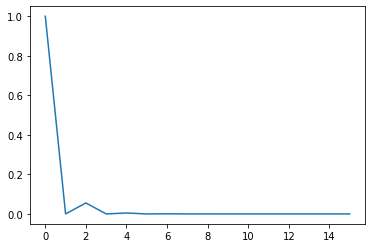

Optimizer: L_BFGS_B          

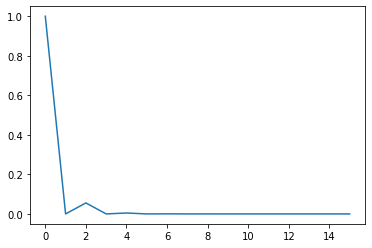

Optimizer: SLSQP          

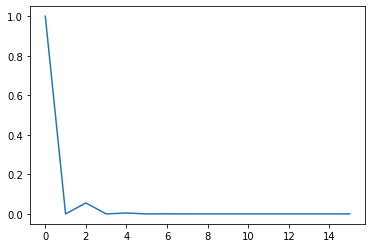

In [14]:
VQE_optimal_vector(**h_osc_params)

55 Pauli factors 
0 s to process
Optimizer: COBYLA          

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: The qiskit.aqua.components.variational_forms.RY object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.RealAmplitudes (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.


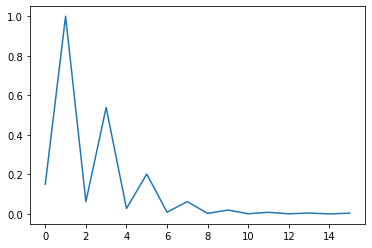

Optimizer: L_BFGS_B          

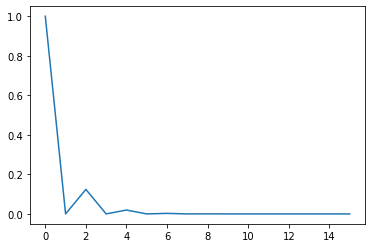

Optimizer: SLSQP          

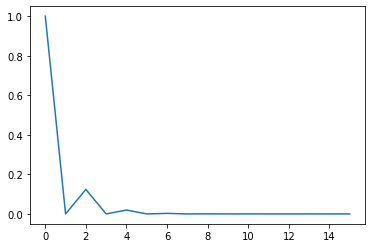

In [15]:
VQE_optimal_vector(**anh_osc_params)

In [4]:
import math

In [2]:
def v_0(m,lam,h):
    return 0.5*(m**2)*(h**2)+0.25*lam*(h**4)
    
def v_1(y_t,lam,h):
    a=1/63*(math.pi**2)
    b=-12*(y_t**4)*(h**4)*(0.25)*np.log(h**2)+9*(lam**2)*(h**4)*np.log(h**2)
    c=9*(lam**2)*(h**4)*np.log(h**2)
    return a*(b+c)
    

In [5]:
a=range(-1000,1000,10)
b=np.ones(len(a))
c=np.ones(len(a))
d=[]
e=[]
for i in range(0,len(a)):
    #print(a[i],b[i],c[i])
    
    d.append(v_1(b[i],c[i],a[i]))
    e.append(v_0(b[i],c[i],a[i]))

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


All constants m, lamda and y_t are set to 1
V_1 max:  32465148525281.117
V_0 max:  250000500000.0


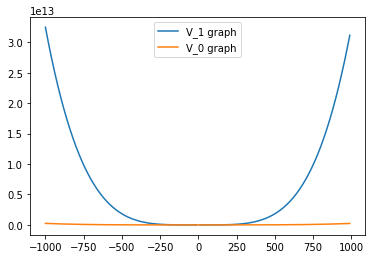

In [10]:
print("All constants m, lamda and y_t are set to 1")
print("V_1 max: ", max(d))

print("V_0 max: ", max(e))

#for i in range(0,len(d)):
 #   print(d[i], a[i])
    
plt.plot(a,d, label="V_1 graph")
plt.plot(a,e, label="V_0 graph")
plt.legend()

plt.show()